In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
#let's check class imbalance

fraud_trans = df[df['Class']==1]
norm_trans = df[df['Class']==0]

print ("Total percentage of fradulant transaction is : ",round(fraud_trans.shape[0]/df.shape[0],3))

total percentage of fradulant transaction is :  0.002


# Exploratory Data Analysis (EDA)

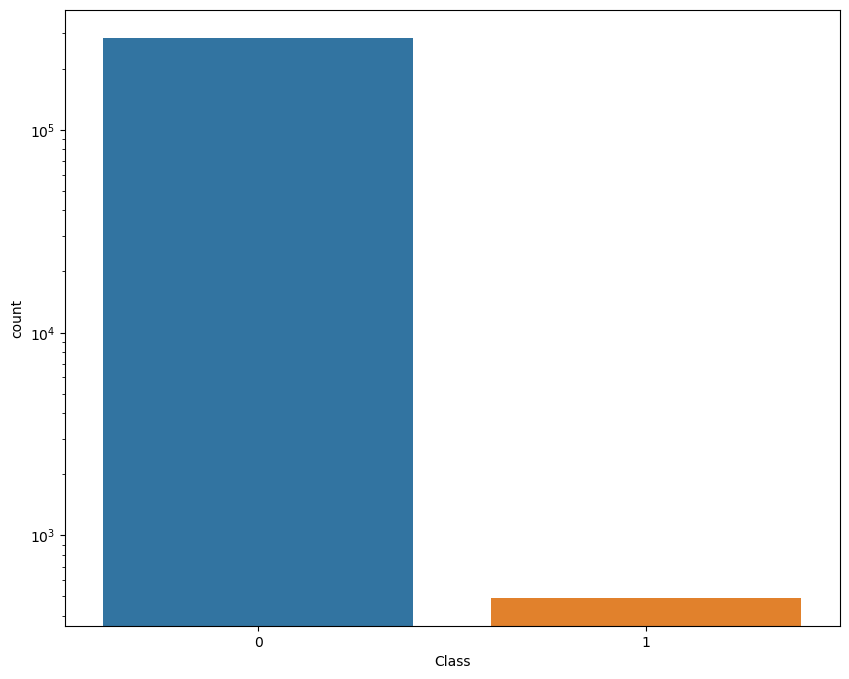

In [8]:
#variation in fradulant and non fradulant data
plt.figure(figsize = (10,8))
ax = sns.countplot(x='Class',data=df)
ax.set_yscale('log')
plt.show()

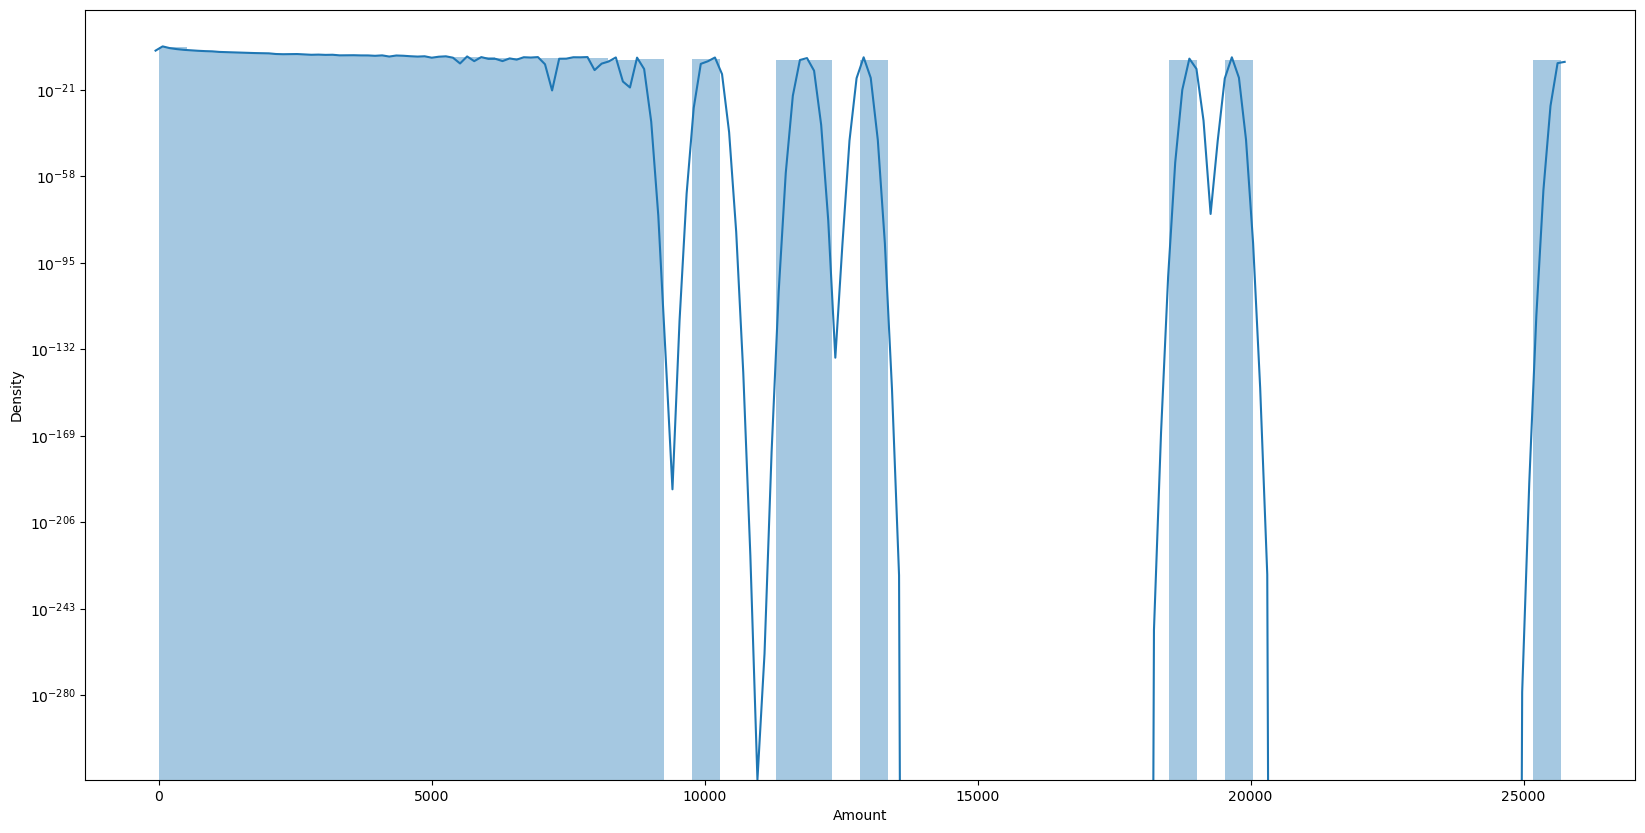

In [10]:
#distribution of transaction amount
plt.figure(figsize=(20,10))
ay = sns.distplot(df['Amount'])
ay.set_yscale('log')
plt.show()

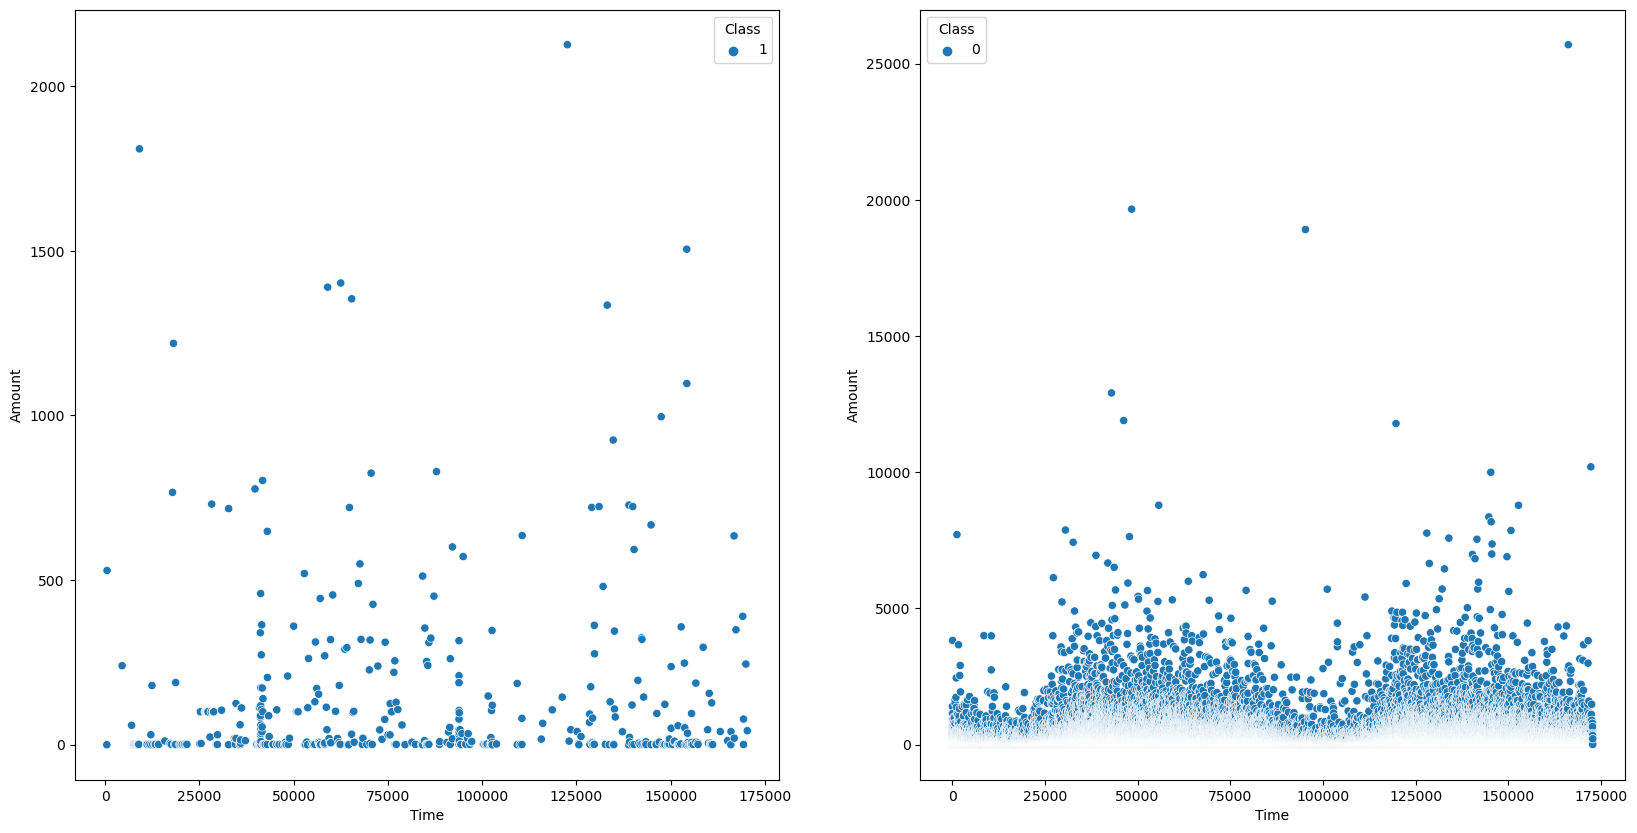

In [12]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=fraud_trans,x="Time",y="Amount",hue="Class")
plt.subplot(1,2,2)
sns.scatterplot(data=norm_trans,x="Time",y="Amount",hue="Class")
plt.show()

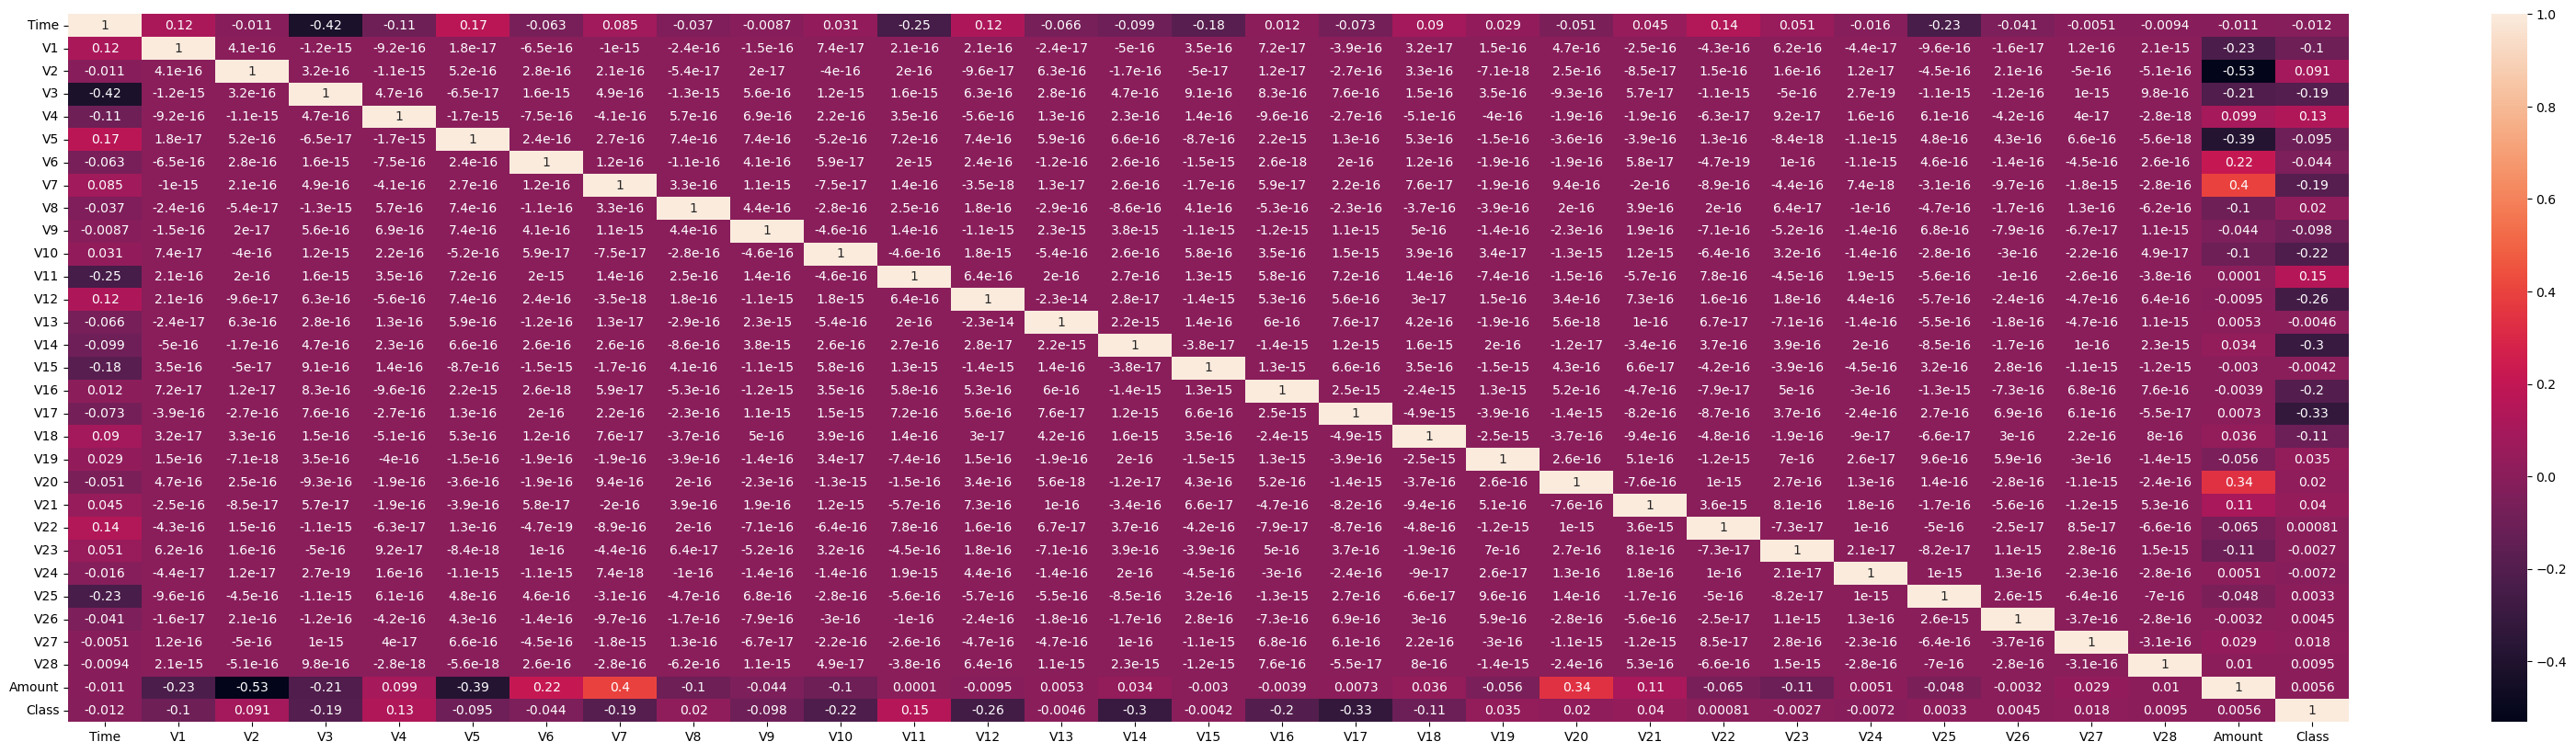

In [13]:
cols = df.columns.tolist()
plt.figure(figsize=(40,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building and Evalution

In [14]:
train,test = train_test_split(df,train_size=0.7,random_state=42)

In [15]:
y_train = train.pop("Class")
X_train = train
y_test = test.pop("Class")
X_test = test

In [16]:
contamin = len(fraud_trans)/float(len(norm_trans))

from sklearn.ensemble import IsolationForest

model = IsolationForest(max_samples=len(X_train),contamination=contamin,random_state=10,verbose=0)
model.fit(X_train)
y_pred = model.predict(X_train)

y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

In [17]:
train_score = accuracy_score(y_train,y_pred)

In [18]:
#final score 
train_score

0.997577295800646

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.32      0.31      0.31       356

    accuracy                           1.00    199364
   macro avg       0.66      0.65      0.65    199364
weighted avg       1.00      1.00      1.00    199364



In [28]:
mis_classify = (y_pred!=y_train).sum()

print("Misclassify in train set : ",mis_classify)

Misclassify in train set :  483


In [29]:
print("Misclassify percentage is ",round(mis_classify/X_train.shape[0],4))

Misclassify percentage is  0.0024


In [22]:
#let's predict test data 

y_test_pred = model.predict(X_test)

y_test_pred[y_test_pred==1]=0
y_test_pred[y_test_pred==-1]=1

In [23]:
test_score = accuracy_score(y_test,y_test_pred)

In [24]:
test_score

0.9979752583593741

In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.36      0.36      0.36       136

    accuracy                           1.00     85443
   macro avg       0.68      0.68      0.68     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
mis_classify_test = (y_test_pred!=y_test).sum()

print("Misclassify in train set : ",mis_classify_test)

Misclassify in train set :  173


In [31]:
print("Misclassify percentage is ",round(mis_classify_test/X_test.shape[0],4))

Misclassify percentage is  0.002
